# **Лабораторная работа №3.**

Загрузка пакетов и датасета для работы:

In [ ]:
%%capture
!wget https://www.dropbox.com/s/bbm6rxqb4bsfl2d/training_data.xlsx
!wget https://www.dropbox.com/s/gjhur7eyzcv265y/test_data.xlsx

In [ ]:
import pandas as pd
training_data = pd.read_excel('training_data.xlsx', usecols=lambda x: 'Unnamed' not in x)
test_data = pd.read_excel('test_data.xlsx', usecols=lambda x: 'Unnamed' not in x)
training_data.head()

,price,year,condition,cylinders,odometer,title_status,transmission,drive,size,lat,long,weather
0,43900,2016,4,6,43500,clean,automatic,4wd,full-size,36.471500,-82.483400,59.0
1,15490,2009,2,8,98131,clean,automatic,4wd,full-size,40.468826,-74.281734,52.0
2,2495,2002,2,8,201803,clean,automatic,4wd,full-size,42.477134,-82.949564,45.0
3,1300,2000,1,8,170305,rebuilt,automatic,4wd,full-size,40.764373,-82.349503,49.0
4,13865,2010,3,8,166062,clean,automatic,4wd,NaN,49.210949,-123.114720,NaN


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Очистка от нечисловых данных:

In [ ]:
training_data = training_data.dropna()

In [ ]:
training_data = training_data._get_numeric_data()

In [ ]:
training_data.head()

,price,year,condition,cylinders,odometer,lat,long,weather
0,43900,2016,4,6,43500,36.471500,-82.483400,59.0
1,15490,2009,2,8,98131,40.468826,-74.281734,52.0
2,2495,2002,2,8,201803,42.477134,-82.949564,45.0
3,1300,2000,1,8,170305,40.764373,-82.349503,49.0
5,6995,2003,3,8,167662,45.518031,-122.578752,50.0


In [ ]:
target_variable_name = 'price'
training_values = training_data[target_variable_name]
training_points = training_data.drop(target_variable_name, axis=1)

In [ ]:
from sklearn.linear_model import LinearRegression
linReg = LinearRegression()


Создание тепловой карты матрицы корреляции:

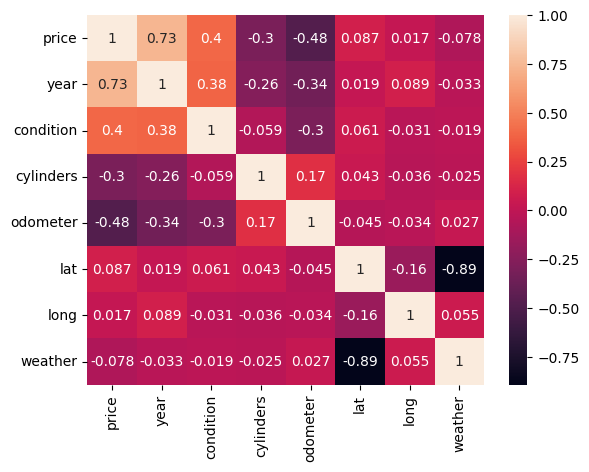

In [ ]:
col = ['price','year','condition','cylinders','odometer','lat','long','weather']
hm = sns.heatmap(training_data[col].corr(),
                 cbar=True,
                 annot=True)


Тестирование модели линейной регрессии:

In [ ]:
X = training_data[['year']].values
y = training_values

In [ ]:
linReg.fit(X, y)
y_pred = linReg.predict(X)

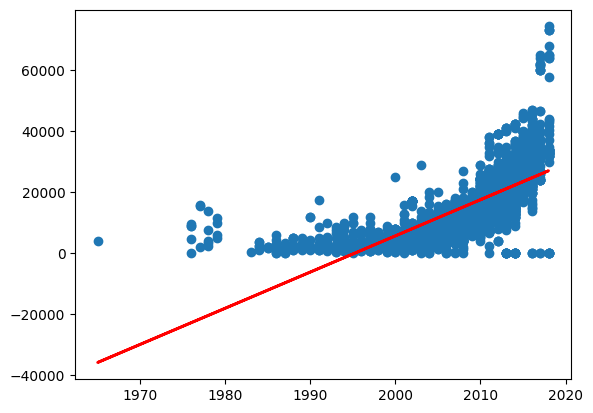

In [ ]:
plt.scatter(X, y)
plt.plot(X, linReg.predict(X), color='red', linewidth=2);

In [ ]:
from sklearn.model_selection import train_test_split
X = training_data[['odometer']].values
y = training_values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

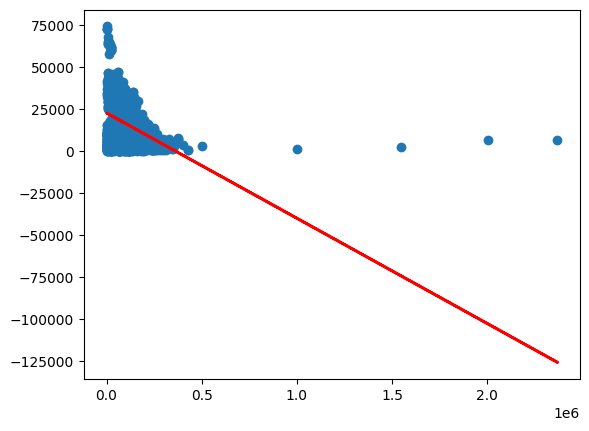

In [ ]:
linReg.fit(X, y)
y_pred = linReg.predict(X)
plt.scatter(X, y)
plt.plot(X, linReg.predict(X), color='red', linewidth=2);

Обучение модели на тренировочных и тестовых данных:

In [ ]:
linReg = LinearRegression()
linReg.fit(X_train, y_train)
y_train_pred = linReg.predict(X_train)
y_test_pred = linReg.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print('MAE train: {:.3f}, test: {:.3f}'.format(
        mean_absolute_error(y_train, y_train_pred),
        mean_absolute_error(y_test, y_test_pred)))
print('MSE train: {:.3f}, test: {:.3f}'.format(
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))

MAE train: 7156.962, test: 7090.500
MSE train: 91717656.713, test: 85003456.201


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print('MAE train: {:.3f}, test: {:.3f}'.format(
        mean_absolute_error(y_train, y_train_pred),
        mean_absolute_error(y_test, y_test_pred)))
print('MSE train: {:.3f}, test: {:.3f}'.format(
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))

MAE train: 7156.962, test: 7090.500
MSE train: 91717656.713, test: 85003456.201


In [ ]:
X = training_data[['odometer']].values
y = training_values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
linReg = LinearRegression()
linReg.fit(X_train, y_train)
y_train_pred = linReg.predict(X_train)
y_test_pred = linReg.predict(X_test)

In [ ]:
print('MAE train: {:.3f}, test: {:.3f}'.format(
        mean_absolute_error(y_train, y_train_pred),
        mean_absolute_error(y_test, y_test_pred)))
print('MSE train: {:.3f}, test: {:.3f}'.format(
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))

MAE train: 7306.330, test: 6996.395
MSE train: 95582811.566, test: 79093141.285


In [ ]:
X = np.asarray([training_data['year'].values, training_data['odometer'].values]).T
y = training_values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
linReg = LinearRegression()
linReg.fit(X_train, y_train)
y_train_pred = linReg.predict(X_train)
y_test_pred = linReg.predict(X_test)

In [ ]:
X

array([[  2016,  43500],
       [  2009,  98131],
       [  2002, 201803],
       ...,
       [  2013,  64412],
       [  2014, 117123],
       [  2010,  91275]])

In [ ]:
y

0       43900
1       15490
2        2495
3        1300
5        6995
        ...  
4906    14850
4907     5979
4908    21480
4909        1
4910    16500
Name: price, Length: 3659, dtype: int64

Работа с инструментами пакета tensorflow.keras и тестирования обучения моделей:

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [ ]:
model = models.Sequential()

model.add(layers.Dense(13, kernel_initializer='uniform',activation = "sigmoid"))

model.add(layers.Dense(20, kernel_initializer='uniform',activation = "sigmoid"))

model.add(layers.Dense(1, activation = 'linear'))

model.compile(
 optimizer = "adam",
 loss = "mean_absolute_error",
 metrics = ["mean_absolute_error"]
)
results = model.fit(
 X_train, y_train,
 epochs= 15,
 batch_size = 1,
 validation_data = (X_test, y_test)
)
print("Test-MAE:", results.history["mean_absolute_error"])

Epoch 1/15
2927/2927 [==============================] - 7s 2ms/step - loss: 15323.4639 - mean_absolute_error: 15323.4639 - val_loss: 15547.1064 - val_mean_absolute_error: 15547.1064
Epoch 2/15
2927/2927 [==============================] - 5s 2ms/step - loss: 15262.1797 - mean_absolute_error: 15262.1797 - val_loss: 15487.9551 - val_mean_absolute_error: 15487.9551
Epoch 3/15
2927/2927 [==============================] - 6s 2ms/step - loss: 15203.3945 - mean_absolute_error: 15203.3945 - val_loss: 15429.1348 - val_mean_absolute_error: 15429.1348
Epoch 4/15
2927/2927 [==============================] - 5s 2ms/step - loss: 15144.7422 - mean_absolute_error: 15144.7422 - val_loss: 15370.4414 - val_mean_absolute_error: 15370.4414
Epoch 5/15
2927/2927 [==============================] - 6s 2ms/step - loss: 15086.1660 - mean_absolute_error: 15086.1660 - val_loss: 15311.7646 - val_mean_absolute_error: 15311.7646
Epoch 6/15
2927/2927 [==============================] - 5s 2ms/step - loss: 15027.6826 - m

In [ ]:
model = models.Sequential()

model.add(layers.Dense(13, kernel_initializer='uniform',activation = "sigmoid"))

model.add(layers.Dense(20, kernel_initializer='uniform',activation = "sigmoid"))

model.add(layers.Dense(1, activation = 'linear'))

model.compile(
 optimizer = "RMSprop",
 loss = "mean_absolute_error",
 metrics = ["mean_absolute_error"]
)
results = model.fit(
 X_train, y_train,
 epochs= 15,
 batch_size = 1,
 validation_data = (X_test, y_test)
)
print("Test-MAE:", results.history["mean_absolute_error"])

Epoch 1/15
2927/2927 [==============================] - 6s 2ms/step - loss: 15328.8428 - mean_absolute_error: 15328.8428 - val_loss: 15554.8535 - val_mean_absolute_error: 15554.8535
Epoch 2/15
2927/2927 [==============================] - 6s 2ms/step - loss: 15269.9580 - mean_absolute_error: 15269.9580 - val_loss: 15495.8242 - val_mean_absolute_error: 15495.8242
Epoch 3/15
2927/2927 [==============================] - 6s 2ms/step - loss: 15211.3320 - mean_absolute_error: 15211.3320 - val_loss: 15437.0449 - val_mean_absolute_error: 15437.0449
Epoch 4/15
2927/2927 [==============================] - 6s 2ms/step - loss: 15152.6455 - mean_absolute_error: 15152.6455 - val_loss: 15378.2988 - val_mean_absolute_error: 15378.2988
Epoch 5/15
2927/2927 [==============================] - 6s 2ms/step - loss: 15094.0225 - mean_absolute_error: 15094.0225 - val_loss: 15319.5986 - val_mean_absolute_error: 15319.5986
Epoch 6/15
2927/2927 [==============================] - 5s 2ms/step - loss: 15035.5215 - m

In [ ]:
model = LinearRegression()
linReg.fit(X_train, y_train)
y_train_pred = linReg.predict(X_train)
y_test_pred = linReg.predict(X_test)

In [ ]:
print('MAE train: {:.3f}, test: {:.3f}'.format(
        mean_absolute_error(y_train, y_train_pred),
        mean_absolute_error(y_test, y_test_pred)))
print('MSE train: {:.3f}, test: {:.3f}'.format(
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))

MAE train: 4824.250, test: 4608.361
MSE train: 48083874.887, test: 42887112.439


In [ ]:
model = models.Sequential()

model.add(layers.Dense(13, kernel_initializer='uniform',activation = "selu"))

model.add(layers.Dense(30, kernel_initializer='uniform',activation = "selu"))

model.add(layers.Dense(1, activation = 'linear'))

model.compile(
 optimizer = "RMSprop",
 loss = "mean_absolute_error",
 metrics = ["mean_absolute_error"]
)
results = model.fit(
 X_train, y_train,
 epochs= 15,
 batch_size = 1,
 validation_data = (X_test, y_test)
)
print("Test-MAE:", results.history["mean_absolute_error"])

Epoch 1/15
2927/2927 [==============================] - 9s 3ms/step - loss: 11514.1348 - mean_absolute_error: 11514.1348 - val_loss: 9991.5947 - val_mean_absolute_error: 9991.5947
Epoch 2/15
2927/2927 [==============================] - 6s 2ms/step - loss: 7425.4941 - mean_absolute_error: 7425.4941 - val_loss: 6077.3574 - val_mean_absolute_error: 6077.3574
Epoch 3/15
2927/2927 [==============================] - 6s 2ms/step - loss: 6267.4648 - mean_absolute_error: 6267.4648 - val_loss: 6183.0142 - val_mean_absolute_error: 6183.0142
Epoch 4/15
2927/2927 [==============================] - 6s 2ms/step - loss: 6254.3799 - mean_absolute_error: 6254.3799 - val_loss: 5966.9673 - val_mean_absolute_error: 5966.9673
Epoch 5/15
2927/2927 [==============================] - 7s 2ms/step - loss: 6224.7031 - mean_absolute_error: 6224.7031 - val_loss: 6599.6196 - val_mean_absolute_error: 6599.6196
Epoch 6/15
2927/2927 [==============================] - 6s 2ms/step - loss: 6177.9004 - mean_absolute_error:

In [ ]:
model = models.Sequential()

model.add(layers.Dense(13, kernel_initializer='uniform',activation = "sigmoid"))

model.add(layers.Dense(20, kernel_initializer='uniform',activation = "sigmoid"))

model.add(layers.Dense(1, activation = 'linear'))

model.compile(
 optimizer = "SGD",
 loss = "mean_absolute_error",
 metrics = ["mean_absolute_error"]
)
results = model.fit(
 X_train, y_train,
 epochs= 10,
 batch_size = 1,
 validation_data = (X_test, y_test)
)
print("Test-MAE:", results.history["mean_absolute_error"])

Epoch 1/10
2927/2927 [==============================] - 7s 2ms/step - loss: 15084.1035 - mean_absolute_error: 15084.1035 - val_loss: 15046.9482 - val_mean_absolute_error: 15046.9482
Epoch 2/10
2927/2927 [==============================] - 5s 2ms/step - loss: 14507.6445 - mean_absolute_error: 14507.6445 - val_loss: 14474.7734 - val_mean_absolute_error: 14474.7734
Epoch 3/10
2927/2927 [==============================] - 7s 2ms/step - loss: 13960.7061 - mean_absolute_error: 13960.7061 - val_loss: 13942.2539 - val_mean_absolute_error: 13942.2539
Epoch 4/10
2927/2927 [==============================] - 5s 2ms/step - loss: 13463.0889 - mean_absolute_error: 13463.0889 - val_loss: 13452.5605 - val_mean_absolute_error: 13452.5605
Epoch 5/10
2927/2927 [==============================] - 5s 2ms/step - loss: 13014.2080 - mean_absolute_error: 13014.2080 - val_loss: 13001.6982 - val_mean_absolute_error: 13001.6982
Epoch 6/10
2927/2927 [==============================] - 6s 2ms/step - loss: 12609.7734 - m

In [ ]:
model = models.Sequential()

model.add(layers.Dense(13, kernel_initializer='uniform',activation = "sigmoid"))

model.add(layers.Dense(15, kernel_initializer='uniform',activation = "sigmoid"))

model.add(layers.Dense(10, kernel_initializer='uniform',activation = "sigmoid"))

model.add(layers.Dense(1, kernel_initializer='uniform',activation = 'relu'))

model.compile(
 optimizer = "adam",
 loss = "mean_absolute_error",
 metrics = ["mean_absolute_error"]
)
results = model.fit(
 X_train, y_train,
 epochs= 10,
 batch_size = 1,
 validation_data = (X_test, y_test)
)
print("Test-MAE:", results.history["mean_absolute_error"])

Epoch 1/10
2927/2927 [==============================] - 9s 3ms/step - loss: 15357.3320 - mean_absolute_error: 15357.3320 - val_loss: 15612.9512 - val_mean_absolute_error: 15612.9512
Epoch 2/10
2927/2927 [==============================] - 6s 2ms/step - loss: 15357.3232 - mean_absolute_error: 15357.3232 - val_loss: 15612.9512 - val_mean_absolute_error: 15612.9512
Epoch 3/10
2927/2927 [==============================] - 7s 2ms/step - loss: 15357.3281 - mean_absolute_error: 15357.3281 - val_loss: 15612.9512 - val_mean_absolute_error: 15612.9512
Epoch 4/10
2927/2927 [==============================] - 6s 2ms/step - loss: 15357.3242 - mean_absolute_error: 15357.3242 - val_loss: 15612.9512 - val_mean_absolute_error: 15612.9512
Epoch 5/10
2927/2927 [==============================] - 7s 2ms/step - loss: 15357.3252 - mean_absolute_error: 15357.3252 - val_loss: 15612.9512 - val_mean_absolute_error: 15612.9512
Epoch 6/10
2927/2927 [==============================] - 6s 2ms/step - loss: 15357.3115 - m

In [ ]:
model = models.Sequential()

model.add(layers.Dense(13, kernel_initializer='uniform',activation = "softmax"))

model.add(layers.Dense(15, kernel_initializer='uniform',activation = "sigmoid"))

model.add(layers.Dense(10, kernel_initializer='uniform',activation = "sigmoid"))

model.add(layers.Dense(1, kernel_initializer='uniform',activation = 'linear'))

model.compile(
 optimizer = "RMSprop",
 loss = "mean_absolute_error",
 metrics = ["mean_absolute_error"]
)
results = model.fit(
 X_train, y_train,
 epochs= 10,
 batch_size = 2,
 validation_data = (X_test, y_test)
)
print("Test-MAE:", results.history["mean_absolute_error"])

Epoch 1/10
1464/1464 [==============================] - 4s 2ms/step - loss: 15349.1807 - mean_absolute_error: 15349.1807 - val_loss: 15597.0234 - val_mean_absolute_error: 15597.0234
Epoch 2/10
1464/1464 [==============================] - 4s 3ms/step - loss: 15333.5488 - mean_absolute_error: 15333.5488 - val_loss: 15581.4121 - val_mean_absolute_error: 15581.4121
Epoch 3/10
1464/1464 [==============================] - 3s 2ms/step - loss: 15317.9922 - mean_absolute_error: 15317.9922 - val_loss: 15565.7354 - val_mean_absolute_error: 15565.7354
Epoch 4/10
1464/1464 [==============================] - 4s 3ms/step - loss: 15302.4668 - mean_absolute_error: 15302.4668 - val_loss: 15550.0811 - val_mean_absolute_error: 15550.0811
Epoch 5/10
1464/1464 [==============================] - 3s 2ms/step - loss: 15286.9404 - mean_absolute_error: 15286.9404 - val_loss: 15534.4961 - val_mean_absolute_error: 15534.4961
Epoch 6/10
1464/1464 [==============================] - 4s 3ms/step - loss: 15271.4072 - m

In [ ]:
model = models.Sequential()

model.add(layers.Dense(13, kernel_initializer='uniform',activation = "softmax"))

model.add(layers.Dense(10, kernel_initializer='uniform',activation = "sigmoid"))

model.add(layers.Dense(10, kernel_initializer='uniform',activation = "sigmoid"))

model.add(layers.Dense(1, kernel_initializer='uniform',activation = 'linear'))

model.compile(
 optimizer = "SGD",
 loss = "mean_absolute_error",
 metrics = ["mean_absolute_error"]
)
results = model.fit(
 X_train, y_train,
 epochs= 10,
 batch_size = 20,
 validation_data = (X_test, y_test)
)
print("Test-MAE:", results.history["mean_absolute_error"])

Epoch 1/10
147/147 [==============================] - 1s 3ms/step - loss: 15354.4971 - mean_absolute_error: 15354.4971 - val_loss: 15606.8496 - val_mean_absolute_error: 15606.8496
Epoch 2/10
147/147 [==============================] - 0s 2ms/step - loss: 15345.7207 - mean_absolute_error: 15345.7217 - val_loss: 15594.6133 - val_mean_absolute_error: 15594.6133
Epoch 3/10
147/147 [==============================] - 0s 2ms/step - loss: 15331.2568 - mean_absolute_error: 15331.2568 - val_loss: 15578.8447 - val_mean_absolute_error: 15578.8447
Epoch 4/10
147/147 [==============================] - 0s 2ms/step - loss: 15315.5625 - mean_absolute_error: 15315.5625 - val_loss: 15563.1484 - val_mean_absolute_error: 15563.1484
Epoch 5/10
147/147 [==============================] - 0s 2ms/step - loss: 15300.0059 - mean_absolute_error: 15300.0059 - val_loss: 15547.5889 - val_mean_absolute_error: 15547.5889
Epoch 6/10
147/147 [==============================] - 0s 2ms/step - loss: 15284.5332 - mean_absolute

In [ ]:
model = models.Sequential()

model.add(layers.Dense(13, kernel_initializer='uniform',activation = "selu"))

model.add(layers.Dense(30, kernel_initializer='uniform',activation = "selu"))

model.add(layers.Dense(1, activation = 'linear'))

model.compile(
 optimizer = "adam",
 loss = "mean_absolute_error",
 metrics = ["mean_absolute_error"]
)
results = model.fit(
 X_train, y_train,
 epochs= 15,
 batch_size = 1,
 validation_data = (X_test, y_test)
)
print("Test-MAE:", results.history["mean_absolute_error"])

Epoch 1/15
2927/2927 [==============================] - 7s 2ms/step - loss: 11564.3047 - mean_absolute_error: 11564.3047 - val_loss: 9688.9736 - val_mean_absolute_error: 9688.9736
Epoch 2/15
2927/2927 [==============================] - 5s 2ms/step - loss: 7080.1641 - mean_absolute_error: 7080.1641 - val_loss: 6065.8804 - val_mean_absolute_error: 6065.8804
Epoch 3/15
2927/2927 [==============================] - 6s 2ms/step - loss: 6161.8506 - mean_absolute_error: 6161.8506 - val_loss: 6158.4194 - val_mean_absolute_error: 6158.4194
Epoch 4/15
2927/2927 [==============================] - 6s 2ms/step - loss: 6045.8340 - mean_absolute_error: 6045.8340 - val_loss: 6067.7314 - val_mean_absolute_error: 6067.7314
Epoch 5/15
2927/2927 [==============================] - 7s 2ms/step - loss: 5929.3242 - mean_absolute_error: 5929.3242 - val_loss: 5766.9722 - val_mean_absolute_error: 5766.9722
Epoch 6/15
2927/2927 [==============================] - 5s 2ms/step - loss: 5832.4702 - mean_absolute_error:

In [ ]:
model = LinearRegression()
linReg.fit(X_train, y_train)
y_train_pred = linReg.predict(X_train)
y_test_pred = linReg.predict(X_test)

In [ ]:
print('MAE train: {:.3f}, test: {:.3f}'.format(
        mean_absolute_error(y_train, y_train_pred),
        mean_absolute_error(y_test, y_test_pred)))
print('MSE train: {:.3f}, test: {:.3f}'.format(
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))

MAE train: 4824.250, test: 4608.361
MSE train: 48083874.887, test: 42887112.439


In [ ]:
model = models.Sequential()

model.add(layers.Dense(2, kernel_initializer='uniform',activation = "softmax"))

model.add(layers.Dense(5, kernel_initializer='uniform',activation = "sigmoid"))

model.add(layers.Dense(1, activation = 'linear'))

model.compile(
 optimizer = "RMSprop",
 loss = "mean_squared_error",
 metrics = ["mean_absolute_error", "mean_squared_error"]
)
results = model.fit(
 X_train, y_train,
 epochs= 15,
 batch_size = 1,
 validation_data = (X_test, y_test)
)
print("Test-MAE:", results.history["mean_absolute_error"])
print("Test-MSE:", results.history["mean_squared_error"])

Epoch 1/15
2927/2927 [==============================] - 9s 3ms/step - loss: 352583712.0000 - mean_absolute_error: 15350.5947 - mean_squared_error: 352583712.0000 - val_loss: 360225952.0000 - val_mean_absolute_error: 15598.9180 - val_mean_squared_error: 360225952.0000
Epoch 2/15
2927/2927 [==============================] - 6s 2ms/step - loss: 352127424.0000 - mean_absolute_error: 15336.0137 - mean_squared_error: 352127424.0000 - val_loss: 359771040.0000 - val_mean_absolute_error: 15584.4824 - val_mean_squared_error: 359771040.0000
Epoch 3/15
2927/2927 [==============================] - 6s 2ms/step - loss: 351687488.0000 - mean_absolute_error: 15322.0078 - mean_squared_error: 351687488.0000 - val_loss: 359326720.0000 - val_mean_absolute_error: 15570.6191 - val_mean_squared_error: 359326720.0000
Epoch 4/15
2927/2927 [==============================] - 6s 2ms/step - loss: 351251264.0000 - mean_absolute_error: 15308.0625 - mean_squared_error: 351251264.0000 - val_loss: 358884032.0000 - val_m

In [ ]:
model = models.Sequential()

model.add(layers.Dense(2, kernel_initializer='uniform',activation = "selu"))

model.add(layers.Dense(5, kernel_initializer='uniform',activation = "selu"))

model.add(layers.Dense(1, activation = 'linear'))

model.compile(
 optimizer = "adam",
 loss = "mean_squared_error",
 metrics = ["mean_absolute_error", "mean_squared_error"]
)
results = model.fit(
 X_train, y_train,
 epochs= 15,
 batch_size = 1,
 validation_data = (X_test, y_test)
)
print("Test-MAE:", results.history["mean_absolute_error"])
print("Test-MSE:", results.history["mean_squared_error"])

Epoch 1/15
2927/2927 [==============================] - 9s 3ms/step - loss: 350984512.0000 - mean_absolute_error: 15298.8945 - mean_squared_error: 350984512.0000 - val_loss: 355473696.0000 - val_mean_absolute_error: 15448.7676 - val_mean_squared_error: 355473696.0000
Epoch 2/15
2927/2927 [==============================] - 6s 2ms/step - loss: 342059328.0000 - mean_absolute_error: 15012.0420 - mean_squared_error: 342059328.0000 - val_loss: 343116736.0000 - val_mean_absolute_error: 15052.2305 - val_mean_squared_error: 343116736.0000
Epoch 3/15
2927/2927 [==============================] - 7s 2ms/step - loss: 327558784.0000 - mean_absolute_error: 14532.8770 - mean_squared_error: 327558784.0000 - val_loss: 326133632.0000 - val_mean_absolute_error: 14494.1895 - val_mean_squared_error: 326133632.0000
Epoch 4/15
2927/2927 [==============================] - 6s 2ms/step - loss: 309066688.0000 - mean_absolute_error: 13923.2910 - mean_squared_error: 309066688.0000 - val_loss: 305668000.0000 - val_m

In [ ]:
model = models.Sequential()

model.add(layers.Dense(10, kernel_initializer='uniform',activation = "selu"))

model.add(layers.Dense(20, kernel_initializer='uniform',activation = "selu"))

model.add(layers.Dense(5, activation = 'linear'))

model.compile(
 optimizer = "adam",
 loss = "mean_squared_error",
 metrics = ["mean_absolute_error", "mean_squared_error"]
)
results = model.fit(
 X_train, y_train,
 epochs= 15,
 batch_size = 1,
 validation_data = (X_test, y_test)
)
print("Test-MAE:", results.history["mean_absolute_error"])
print("Test-MSE:", results.history["mean_squared_error"])

Epoch 1/15
2927/2927 [==============================] - 7s 2ms/step - loss: 259017328.0000 - mean_absolute_error: 11919.4561 - mean_squared_error: 259017328.0000 - val_loss: 223906368.0000 - val_mean_absolute_error: 11272.9307 - val_mean_squared_error: 223906368.0000
Epoch 2/15
2927/2927 [==============================] - 7s 2ms/step - loss: 221647760.0000 - mean_absolute_error: 11119.1846 - mean_squared_error: 221647760.0000 - val_loss: 181257104.0000 - val_mean_absolute_error: 10050.2432 - val_mean_squared_error: 181257104.0000
Epoch 3/15
2927/2927 [==============================] - 6s 2ms/step - loss: 111479408.0000 - mean_absolute_error: 7831.9131 - mean_squared_error: 111479408.0000 - val_loss: 67145216.0000 - val_mean_absolute_error: 5952.3130 - val_mean_squared_error: 67145216.0000
Epoch 4/15
2927/2927 [==============================] - 6s 2ms/step - loss: 69726496.0000 - mean_absolute_error: 6125.5552 - mean_squared_error: 69726496.0000 - val_loss: 66188204.0000 - val_mean_abso

In [ ]:
model = LinearRegression()
linReg.fit(X_train, y_train)
y_train_pred = linReg.predict(X_train)
y_test_pred = linReg.predict(X_test)

print('MAE train: {:.3f}, test: {:.3f}'.format(
        mean_absolute_error(y_train, y_train_pred),
        mean_absolute_error(y_test, y_test_pred)))
print('MSE train: {:.3f}, test: {:.3f}'.format(
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))

MAE train: 4824.250, test: 4608.361
MSE train: 48083874.887, test: 42887112.439


Изначальные результаты были:
```
MAE train: 7156.962, test: 7090.500
MSE train: 91717656.713, test: 85003456.201
```